In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.models.segmentation import deeplabv3_resnet101
from torchvision import transforms


In [3]:
# Cargar la imagen
image_path = '../imgs/001.jpg'
image = cv2.imread(image_path)

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar desenfoque para reducir el ruido
blurred_image = cv2.blur(gray_image, (3, 3))

# Detectar bordes usando Canny
canny_output = cv2.Canny(blurred_image, 100, 200)

# Encontrar contornos
contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

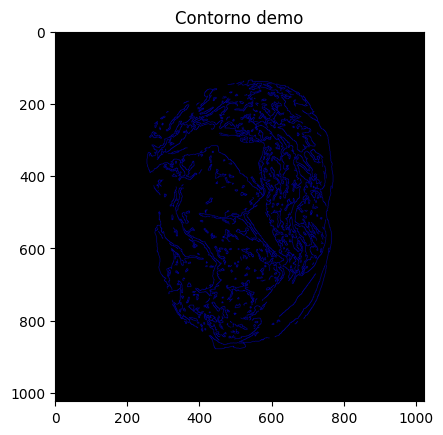

In [4]:
# Crear una imagen para dibujar los resultados
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

# Dibujar contornos
for i in range(len(contours)):
    color = (255, 0, 0)  # Color azul para los contornos
    cv2.drawContours(drawing, contours, i, color)

# Guardar la imagen resultante
output_path = '../imgs/contorno_result.jpg'
cv2.imwrite(output_path, drawing)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(drawing, cv2.COLOR_BGR2RGB))
plt.title('Contorno demo')
plt.show()